# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/kaggle/input/airways-customer-data/customer_airways_data.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.shape

(50000, 14)

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
df.shape

(50000, 14)

# Data Preprocessing

In [10]:
def unique_value_explorer(column_name):
    """Print counts of unique values and the number of unique values"""
    
    print(f'Unique values of {column_name}:\n')
    print(f'Total unique values: {df[column_name].value_counts().size}\n')
    print(df[column_name].value_counts())
    print('\n\n')

# Select object type columns
string_cols = df.select_dtypes('object').columns

# Summarise unique values of object type columns
for col in string_cols:
    unique_value_explorer(col)

Unique values of sales_channel:

Total unique values: 2

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64



Unique values of trip_type:

Total unique values: 3

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64



Unique values of route:

Total unique values: 799

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64



Unique values of booking_origin:

Total unique values: 104

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64





In [11]:
# Spare copy
df_copy = df.copy()

# Label encode object type columns
for col in string_cols:
    df[col] = df[col].factorize()[0]

# Preview label encoded columns    
df[string_cols]

,sales_channel,trip_type,route,booking_origin
0,0,0,0,0
1,0,0,0,0
2,0,0,0,1
3,0,0,0,0
4,0,0,0,1
...,...,...,...,...
49995,0,0,638,36
49996,0,0,638,36
49997,0,0,638,36
49998,0,0,638,36


# Feature Engineering

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA algorithm
pca = PCA()
X_pca = pca.fit_transform(X)

# Create PCA dataframe with all scores
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

# Match principal columns with original features after transposing pca values
loadings = pd.DataFrame(
    pca.components_.T,
    columns=component_names,  
    index=X.columns
)

loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
num_passengers,-0.000225,0.002384,-0.003039,-0.006136,0.000883,0.004663,0.062894,0.991676,0.094563,0.058805,0.012119,-0.000183,0.000700
sales_channel,-0.000020,-0.000050,-0.000595,-0.000997,0.001227,0.006781,0.005191,-0.005622,0.001148,0.065724,0.115864,0.990897,0.016468
trip_type,0.000010,0.000019,-0.000057,0.000090,0.000097,-0.000069,-0.005960,-0.000031,0.005127,-0.013165,-0.000608,-0.015645,0.999760
purchase_lead,-0.058085,0.997662,0.034775,0.008788,-0.001952,-0.000795,0.001047,-0.002272,-0.000350,-0.000094,-0.000070,0.000084,-0.000009
length_of_stay,-0.000424,-0.034146,0.996900,-0.070466,0.003504,-0.000272,0.005764,0.002023,0.002090,0.001701,0.000847,0.000288,0.000115
flight_hour,-0.000468,0.002072,-0.003640,-0.002807,0.999937,-0.009676,-0.000625,-0.000878,0.001366,-0.001476,-0.000292,-0.001045,-0.000144
flight_day,-0.000178,0.000764,0.000165,0.000077,0.009668,0.999687,0.021074,-0.006014,0.001097,-0.002220,-0.000623,-0.006779,0.000053
route,0.998178,0.058211,0.001308,-0.015792,0.000308,0.000160,-0.001321,0.000067,0.000060,0.000046,-0.000041,0.000016,-0.000017
booking_origin,0.016306,-0.010275,0.070014,0.997187,0.003093,-0.000440,0.017399,0.005094,0.002092,0.000109,0.000741,0.000886,0.000023
wants_extra_baggage,0.000052,-0.000114,0.002454,0.000625,-0.000530,-0.000167,-0.011380,0.097751,-0.459122,-0.867715,-0.144190,0.075697,-0.008039


<Axes: >

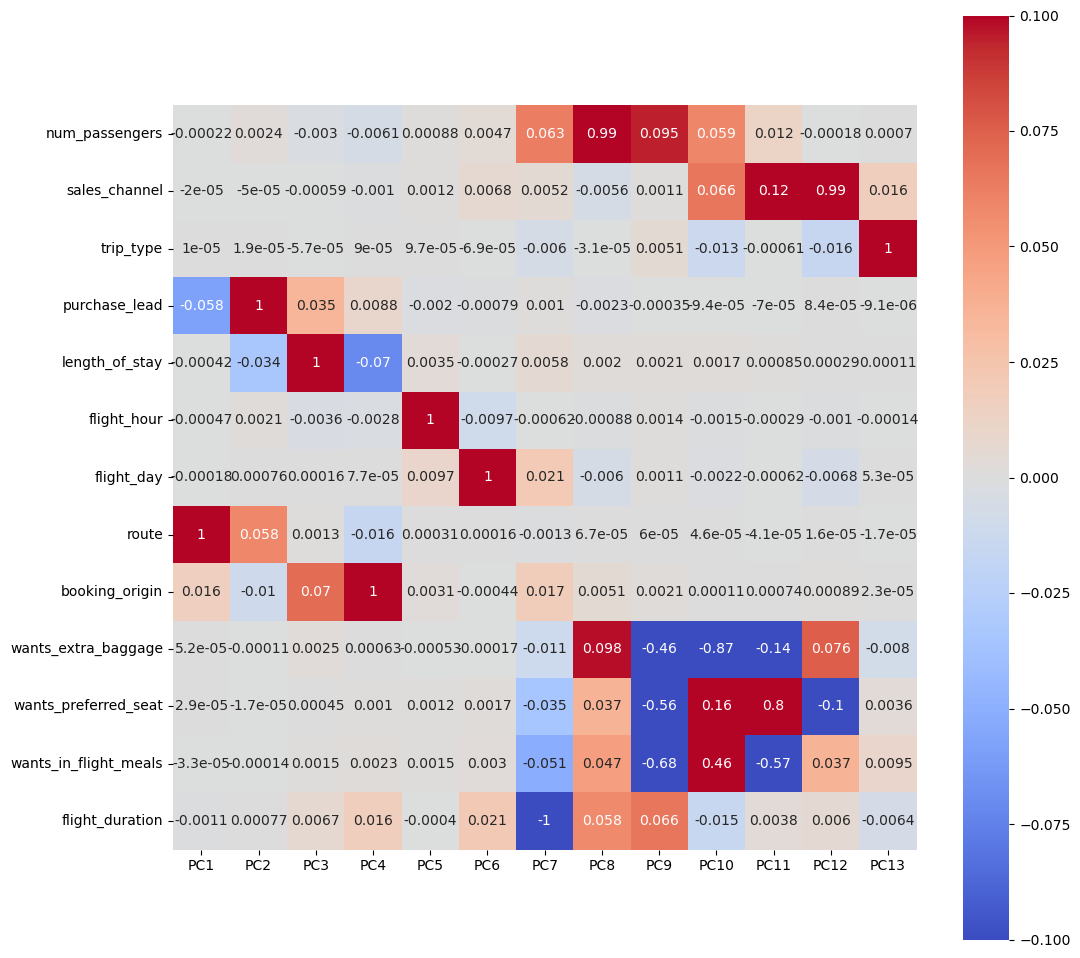

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(loadings, 
            cmap='coolwarm', 
            annot=True, 
            square=True, 
            vmin=-0.1, 
            vmax=0.1
           )

In [16]:
# look at mutual information now
from sklearn.feature_selection import mutual_info_classif

def calculate_mi(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    return mi_scores

def mi_scores(X,y):

    average_mi = pd.DataFrame(calculate_mi(X,y))

    for i in range(10):
        score_calculation = calculate_mi(X,y)
        average_mi = average_mi.join(score_calculation, rsuffix='_'+str(i))
        
    mean_mi_scores = average_mi.mean(axis=1).sort_values(ascending=False)
    
    return mean_mi_scores

def visualise_mi(mi_scores):
    scores = mi_scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    
def calculate_correlation(method, target_variable, data):
    
    correlations_raw = data.corr(method=method)[target_variable].drop(target_variable) 
    correlations = correlations_raw.abs().sort_values(ascending=False)
    correlations = correlations.rename(f'{method}_correlation_scores')
    
    return (correlations, correlations_raw)

def feature_scores(data, target_variable):
    
    # Setup data
    X = data.drop(target_variable, axis=1)
    y = data[target_variable]

    # Caluclate mutual information scores and setup scores dataframe
    scores_df = pd.DataFrame(mi_scores(X, y), columns=['mi_scores'])
    scores_df['mi_scores_rank'] = scores_df.rank(ascending=False)
    
    # Correlation types
    correlation_types = ['pearson', 'spearman', 'kendall']
    
    # Calculate correlations
    for var in correlation_types:
        
        # Calculate the correlation for each type
        correlations = calculate_correlation(var, target_variable, data)
        
        # Turn scores into dataframe
        correlation_scores_df = pd.DataFrame(correlations[0])
        
        # Create ranking column for each correlation
        correlation_scores_df[f'{var}_correlation_rank'] = correlation_scores_df.rank(ascending=False)
        
        # Store scores
        scores_df = pd.concat([scores_df, correlation_scores_df], axis=1)
        
    return scores_df

def evaluate_scores(data, focus):
    
    mi = data['mi_scores_rank']
    pearson = data['pearson_correlation_rank']
    spearman = data['spearman_correlation_rank']
    kendall = data['kendall_correlation_rank']
    
    if focus == 'overall':
        data['overall_score'] = mi**2 + pearson + spearman + kendall
    
    if focus == 'linear':
        data['overall_score'] = mi + pearson**2 + spearman*0.5 + kendall*0.5
    
    if focus == 'non-linear':
        data['overall_score'] = mi**2 + spearman + kendall
    
    return data
    
        

In [17]:
X_combined = pd.concat([X, X_pca], axis=1)
combined_df = pd.concat([X_combined, y], axis=1)
# combined_df
scores = feature_scores(data=combined_df, target_variable='booking_complete')

In [18]:
scores

,mi_scores,mi_scores_rank,pearson_correlation_scores,pearson_correlation_rank,spearman_correlation_scores,spearman_correlation_rank,kendall_correlation_scores,kendall_correlation_rank
route,0.053377,1.0,0.006529,23.0,0.003411,25.0,0.002797,25.0
booking_origin,0.048149,2.0,0.160146,1.0,0.112504,2.0,0.098534,2.0
PC4,0.033025,3.0,0.158191,2.0,0.149686,1.0,0.122220,1.0
PC1,0.031581,4.0,0.006146,24.0,0.002753,26.0,0.002248,26.0
flight_duration,0.017708,5.0,0.106266,3.0,0.097633,4.0,0.084643,4.0
PC7,0.015165,6.0,0.071221,5.0,0.070957,7.0,0.057937,8.0
PC3,0.013187,7.0,0.050025,9.0,0.108677,3.0,0.088735,3.0
PC9,0.012774,8.0,0.093392,4.0,0.094071,5.0,0.076809,5.0
PC11,0.012035,9.0,0.003936,26.0,0.012506,20.0,0.010211,20.0
wants_extra_baggage,0.008656,10.0,0.068139,6.0,0.068139,9.0,0.068139,7.0


In [19]:
evaluate_scores(data=scores, focus='overall')
scores.sort_values(by='overall_score')['overall_score'][:6]

booking_origin      9.0
PC4                13.0
flight_duration    36.0
PC7                56.0
PC3                64.0
route              74.0
Name: overall_score, dtype: float64

In [20]:
evaluate_scores(data=scores, focus='non-linear')
scores.sort_values(by='overall_score')['overall_score'][:6]

booking_origin      8.0
PC4                11.0
flight_duration    33.0
route              51.0
PC7                51.0
PC3                55.0
Name: overall_score, dtype: float64

In [21]:
evaluate_scores(data=scores, focus='linear')
scores.sort_values(by='overall_score')['overall_score'][:6]

booking_origin          5.0
PC4                     8.0
flight_duration        18.0
PC9                    29.0
PC7                    38.5
wants_extra_baggage    54.0
Name: overall_score, dtype: float64

# Modelling

In [22]:
combined_df['booking_complete']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import  cross_val_score, GridSearchCV, train_test_split
from xgboost import XGBClassifier

# Split data first
# Modelling with top 6 features, all features move models hyperparameter tuning
# get best parameters use
# calculate metrics confusion matrix, classification report > final scores

In [24]:
top_5_features = ['booking_origin', 'PC4', 'flight_duration', 'PC7', 'PC3']
top_6_features = ['booking_origin', 'PC4', 'flight_duration', 'PC7', 'PC3', 'route']

X_full = combined_df.drop('booking_complete', axis=1)
X_top_5 = X_full[top_5_features]
X_top_6 = X_full[top_6_features]
y = combined_df['booking_complete']

#train test split

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, random_state=0)
X_train_top_5, X_test_top_5, y_train_top_5, y_test_top_5 = train_test_split(X_top_5, y, random_state=0)
X_train_top_6, X_test_top_6, y_train_top_6, y_test_top_6 = train_test_split(X_top_6, y, random_state=0)


# find best parameters > score take parameters and do confusion matrix, classification report + cross val score

In [25]:
rf_model = RandomForestClassifier()

# Full data
training_data = [(X_train_full,y_train_full), (X_train_top_5,y_train_top_5), (X_train_top_6,y_train_top_6)]

dict_scores_rf = {}

for i, data in enumerate(training_data):
    scores = cross_val_score(estimator=rf_model, X=data[0], y=data[1], cv=3)
    average_accuracy = scores.mean()
    dict_scores_rf[i] = average_accuracy

Text(0.5, 1.0, 'Barplot with Cross Validation Scores')

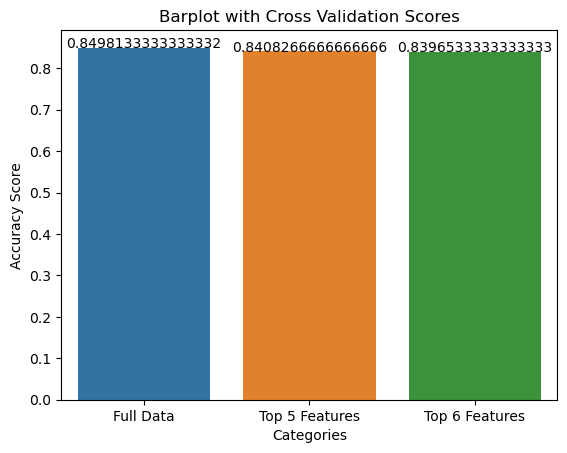

In [27]:
values = list(dict_scores_rf.values())

ax = sns.barplot(y=values, x=['Full Data', 'Top 5 Features', 'Top 6 Features'])

for i, v in enumerate(values):
    ax.text(i, v, str(v), ha='center')
    
plt.xlabel('Categories')
plt.ylabel('Accuracy Score')
plt.title('Barplot with Cross Validation Scores')

In [28]:
xgb_model = XGBClassifier()

# Full data

dict_scores_xgb = {}

for i, data in enumerate(training_data):
    scores = cross_val_score(estimator=rf_model, X=data[0], y=data[1], cv=3)
    average_accuracy = scores.mean()
    dict_scores_xgb[i] = average_accuracy

Text(0.5, 1.0, 'Barplot with Cross Validation Scores')

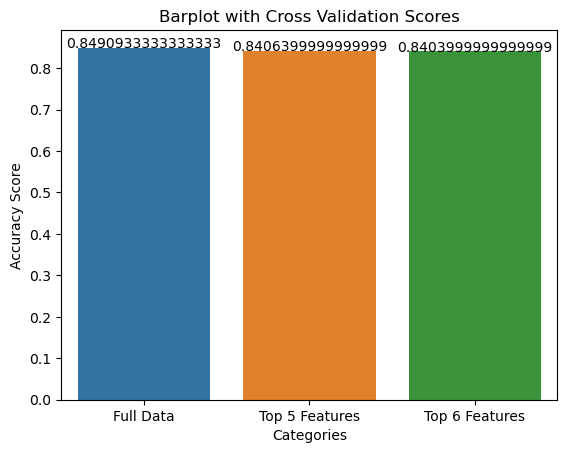

In [29]:
values = list(dict_scores_xgb.values())

ax = sns.barplot(y=values, x=['Full Data', 'Top 5 Features', 'Top 6 Features'])

for i, v in enumerate(values):
    ax.text(i, v, str(v), ha='center')
    
plt.xlabel('Categories')
plt.ylabel('Accuracy Score')
plt.title('Barplot with Cross Validation Scores')

In [30]:
def find_best_parameters(model, parameter_grid, X_data, y_data):

    gridsearch = GridSearchCV(estimator=model, param_grid=parameter_grid)

    gridsearch.fit(X_data, y_data)
    
    best_params = gridsearch.best_params_
    best_score = gridsearch.best_score_
    
    print(f'Best parameters: {best_params}')
    print(f'Best score: {best_score}')

In [31]:
# Random Forest Classifier

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


# All data
find_best_parameters(model=rf_model, parameter_grid=rf_param_grid, X_data=X_train_full, y_data=y_train_full)

Best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.8512000000000001


In [33]:
# Gradient Boosting Classifier

xgboost_model = XGBClassifier()

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [2, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2],
}

find_best_parameters(model=xgboost_model, parameter_grid=xgb_param_grid, X_data=X_train_full, y_data=y_train_full)

Best parameters: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best score: 0.8518933333333333
